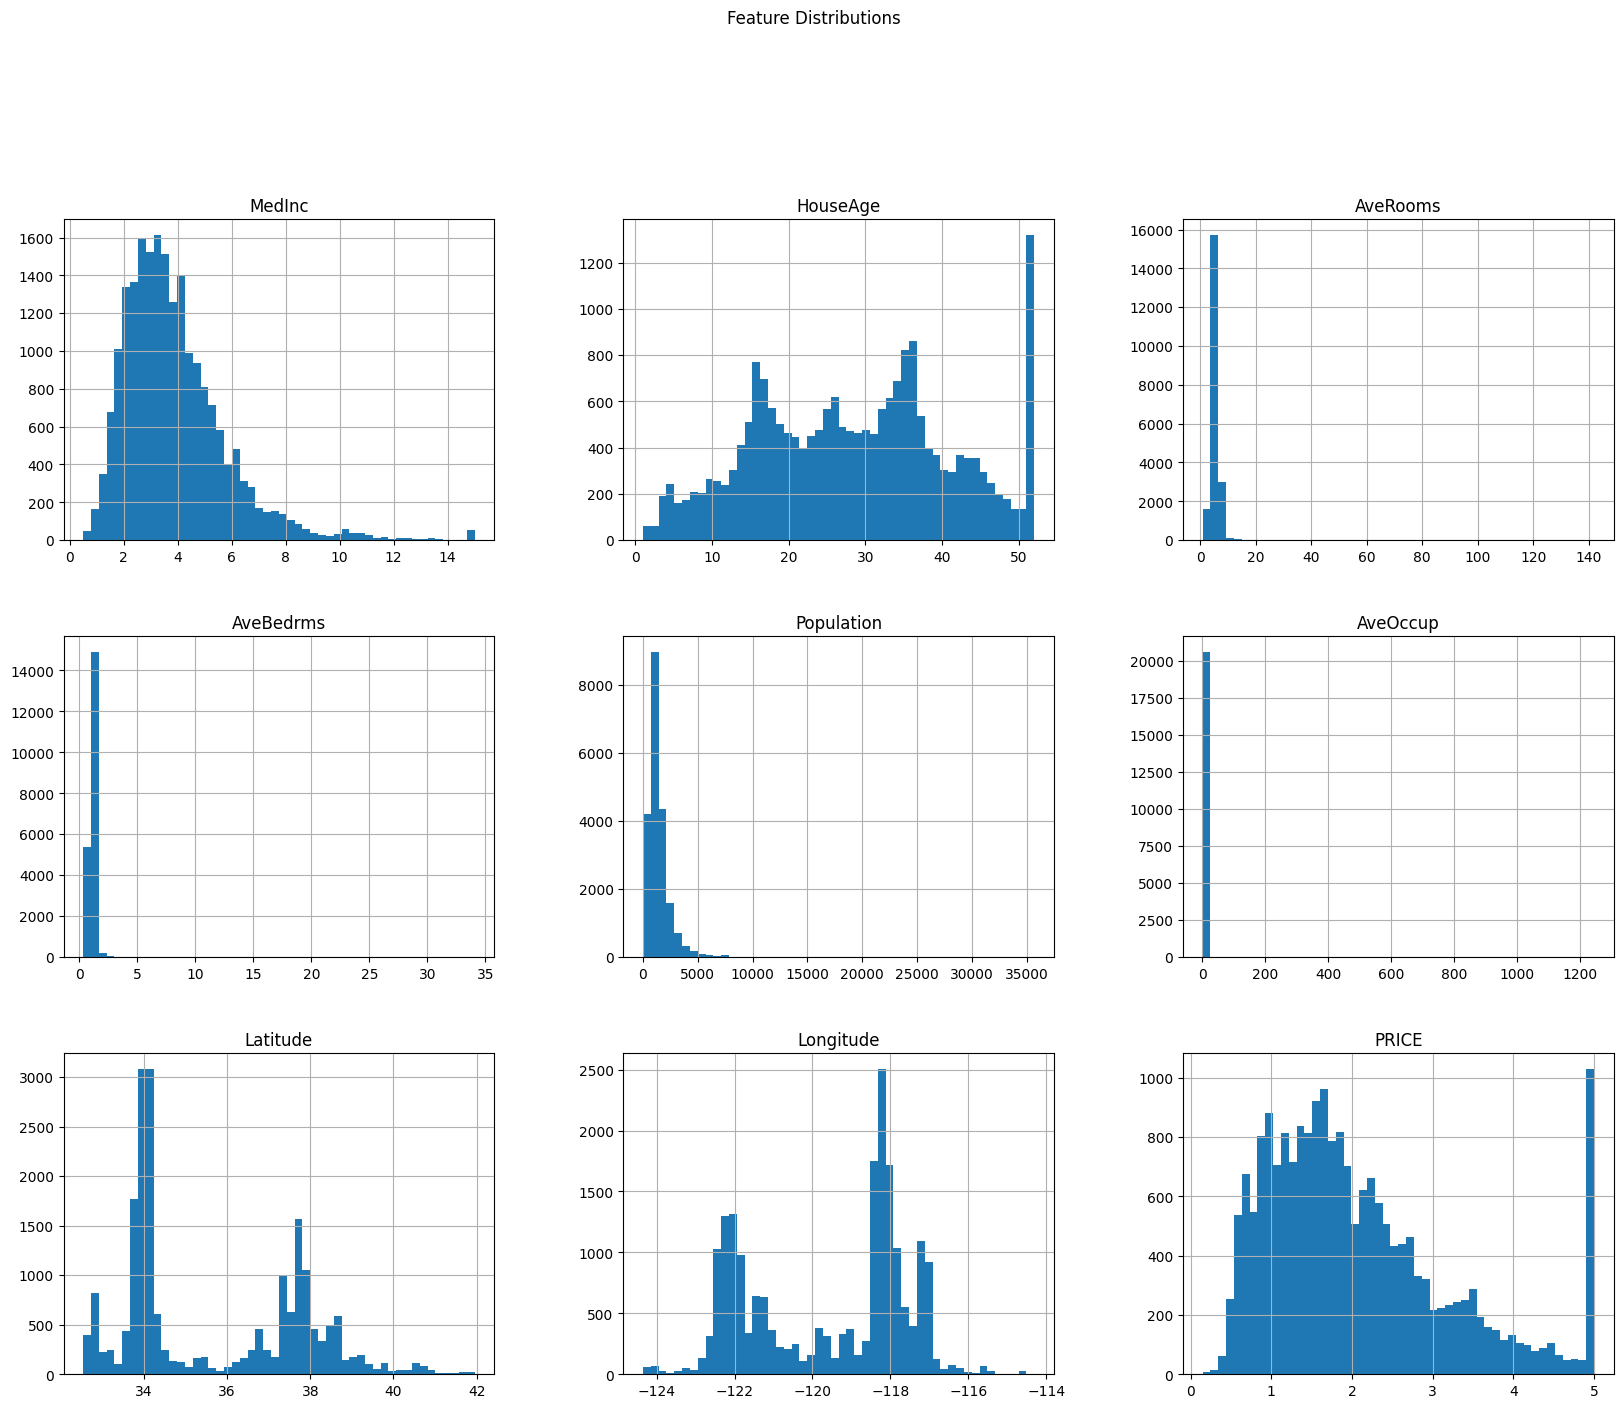

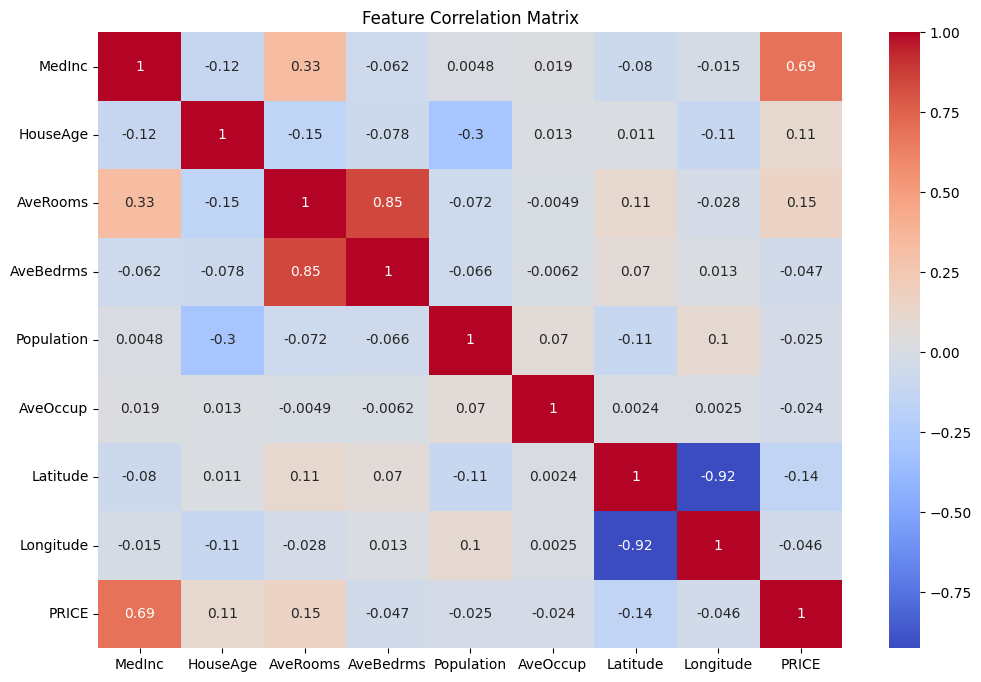

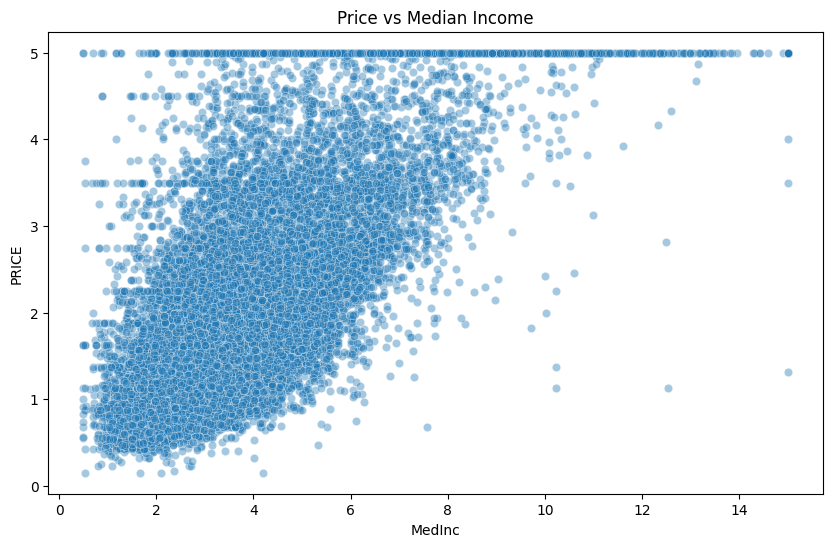

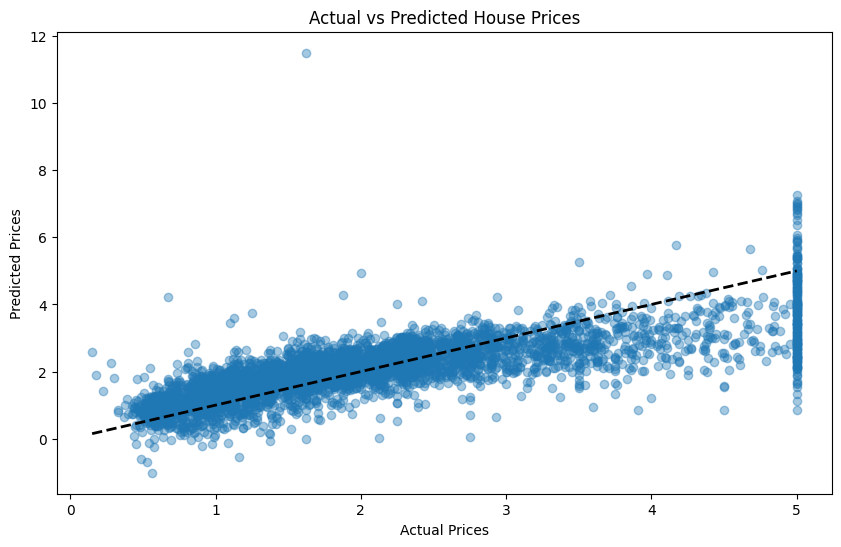

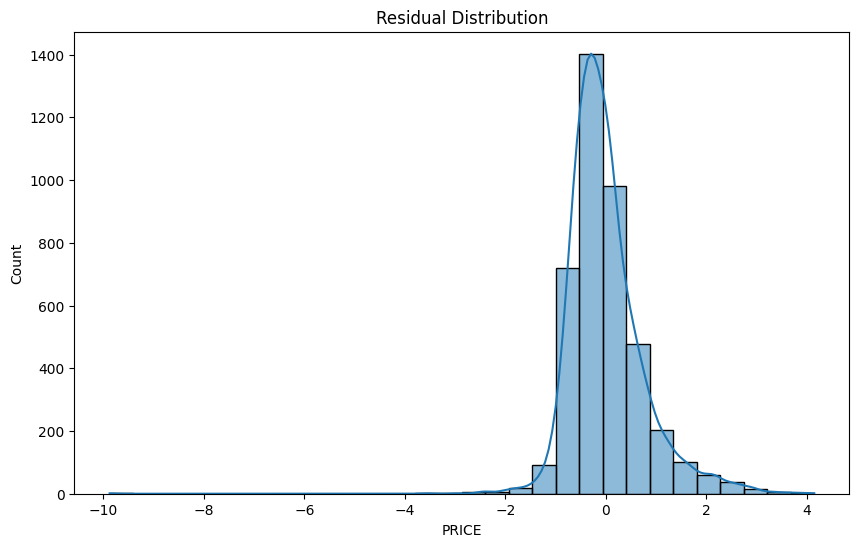

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

# 1. Feature Distribution
df.hist(bins=50, figsize=(20, 15))
plt.suptitle('Feature Distributions', y=1.02)
plt.show()

# 2. Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# 3. Price vs MedInc (Most correlated feature)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='PRICE', data=df, alpha=0.4)
plt.title('Price vs Median Income')
plt.show()

# Train model
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# 4. Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# 5. Residual Plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residual Distribution')
plt.show()